<h1>Importing libraries</h1>

In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<h2>Reading csv file </h2>

In [3]:
df = pd.read_csv("911.csv")

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


<h2>Adding a reasons column for further analysis</h2>

In [5]:
df['Reasons']=df['title'].apply(lambda x:x.split(":")[0])

In [6]:
df['Reasons'].head()

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Reasons, dtype: object

<h3>A countplot for number of calls made per reason</h3>

<AxesSubplot:xlabel='Reasons', ylabel='count'>

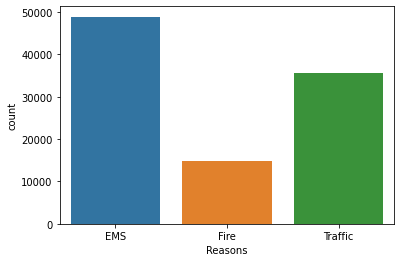

In [7]:
sns.countplot(x='Reasons',data=df)

<h3>Now convert timestamp to date time and use it to create three new columns DAY,MONTH,HOUR</h3>

In [69]:
df['timeStamp']=df['timeStamp'].apply(pd.to_datetime,utc=True)

In [70]:
df['Hour']=df['timeStamp'].apply(lambda x:x.hour)
df['Day of Week']=df['timeStamp'].apply(lambda x:x.dayofweek)
df['Month']=df['timeStamp'].apply(lambda x:x.month)

In [71]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
df['Day of Week']=df['Day of Week'].map(dmap)

In [72]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week,Date,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00+00:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,2015-12-10,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00+00:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,2015-12-10,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00+00:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thu,2015-12-10,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01+00:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thu,2015-12-10,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01+00:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thu,2015-12-10,12


<h3>Plotting using seaborn </h3>

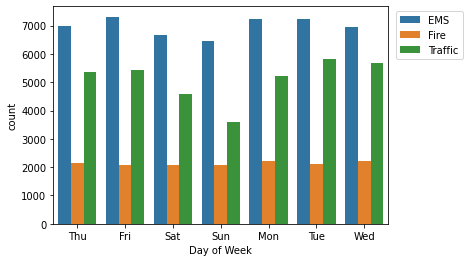

In [73]:
sns.countplot(x='Day of Week',data=df,hue='Reasons')
plt.legend(bbox_to_anchor=(1.01,1))

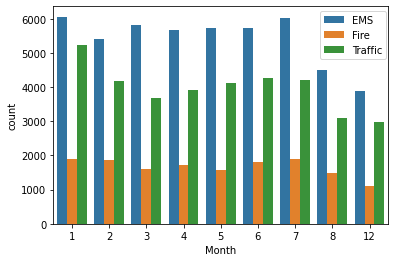

In [74]:
sns.countplot(x='Month',data=df,hue='Reasons')
plt.legend(bbox_to_anchor=(1.01,1))

<h3>Now as observed in above plot some months are missing</h3>
<p>To fix that we will now use a aggregate function while grouping by months</p>

In [75]:
byMonth = df.groupby('Month').count()

In [76]:
byMonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week,Date
Month,,,,,,,,,,,,,
1,13205,13205,13205,11527,13205,13205,13203,13096,13205,13205,13205,13205,13205
2,11467,11467,11467,9930,11467,11467,11465,11396,11467,11467,11467,11467,11467
3,11101,11101,11101,9755,11101,11101,11092,11059,11101,11101,11101,11101,11101
4,11326,11326,11326,9895,11326,11326,11323,11283,11326,11326,11326,11326,11326
5,11423,11423,11423,9946,11423,11423,11420,11378,11423,11423,11423,11423,11423


<AxesSubplot:xlabel='Month', ylabel='Reasons'>

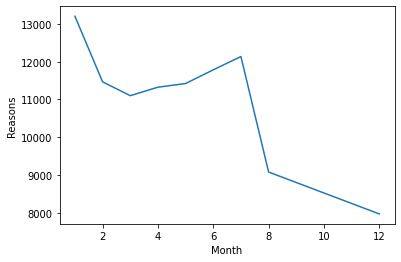

In [77]:
sns.lineplot(x='Month',y='Reasons',data=byMonth)

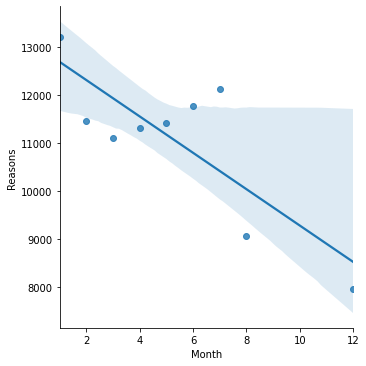

In [78]:
sns.lmplot(x='Month',y='Reasons',data=byMonth.reset_index())

<h3>Creating a Date column </h3>

In [79]:
df['Date']=df['timeStamp'].apply(lambda x:x.date())

In [80]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,Reasons,Hour,Day of Week,Date,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00+00:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,Thu,2015-12-10,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00+00:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,Thu,2015-12-10,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00+00:00,NORRISTOWN,HAWS AVE,1,Fire,17,Thu,2015-12-10,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01+00:00,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,Thu,2015-12-10,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01+00:00,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,EMS,17,Thu,2015-12-10,12


In [81]:
byDate = df.groupby('Date').count()

<AxesSubplot:xlabel='Date', ylabel='Reasons'>

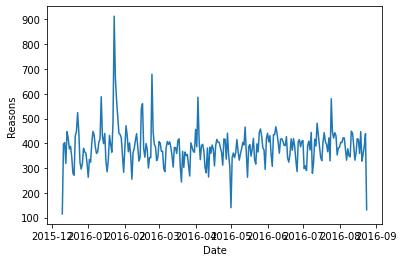

In [82]:
sns.lineplot(x='Date',y='Reasons',data=byDate)

In [83]:
byTraffic=df[df['Reasons']=='Traffic'].groupby('Date').count()

Text(0.5, 1.0, 'Traffic')

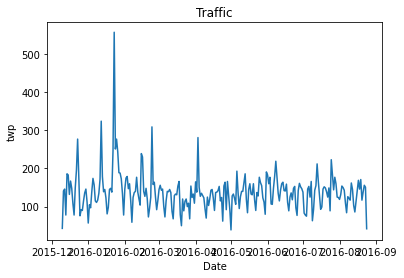

In [84]:
sns.lineplot(x='Date',y='twp',data=byTraffic)
plt.title('Traffic')

In [85]:
byFire = df[df['Reasons']=="Fire"].groupby('Date').count()

Text(0.5, 1.0, 'Fire')

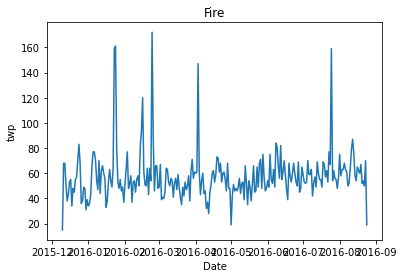

In [86]:
sns.lineplot(x='Date',y='twp',data=byFire)
plt.title('Fire')

In [87]:
byEMS = df[df['Reasons']=="EMS"].groupby('Date').count()

Text(0.5, 1.0, 'EMS')

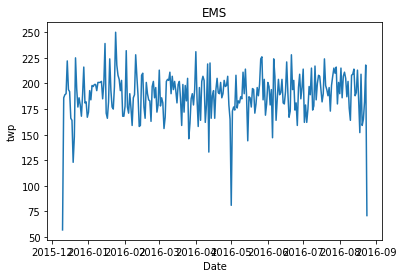

In [88]:
sns.lineplot(x='Date',y='twp',data=byEMS)
plt.title('EMS')

<h5>Using groupby and unstack</h5>

In [89]:
byDateHour=df.groupby(by=['Day of Week','Hour']).count()['Reasons'].unstack()

<AxesSubplot:xlabel='Hour', ylabel='Day of Week'>

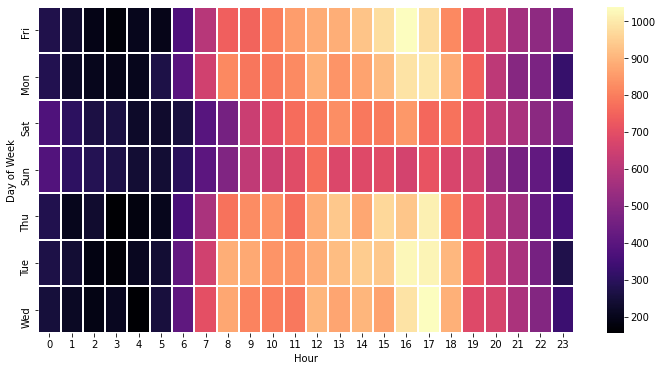

In [90]:
plt.figure(figsize=(12,6))
sns.heatmap(byDateHour,lw=1,linecolor='white',cmap='magma')

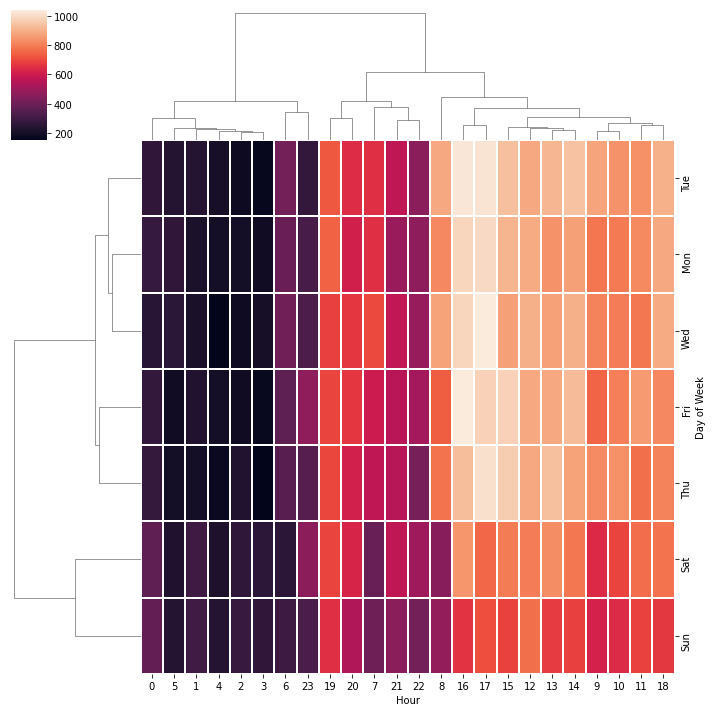

In [91]:
sns.clustermap(byDateHour,lw=1)

<h5>Taking month as a column</h5>

In [92]:
byMonth=df.groupby(by=['Day of Week','Month']).count()['Reasons'].unstack()

In [93]:
byMonth

Month,1,2,3,4,5,6,7,8,12
Day of Week,,,,,,,,,
Fri,1970,1581,1525,1958,1730,1649,2045,1310,1065
Mon,1727,1964,1535,1598,1779,1617,1692,1511,1257
Sat,2291,1441,1266,1734,1444,1388,1695,1099,978
Sun,1960,1229,1102,1488,1424,1333,1672,1021,907
Thu,1584,1596,1900,1601,1590,2065,1646,1230,1266
Tue,1973,1753,1884,1430,1918,1676,1670,1612,1234
Wed,1700,1903,1889,1517,1538,2058,1717,1295,1262


<AxesSubplot:xlabel='Month', ylabel='Day of Week'>

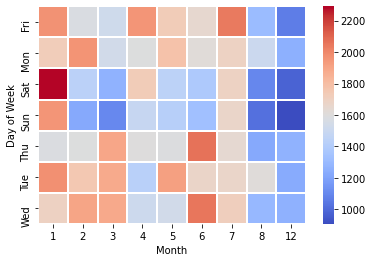

In [94]:
sns.heatmap(byMonth,lw=1,cmap='coolwarm')

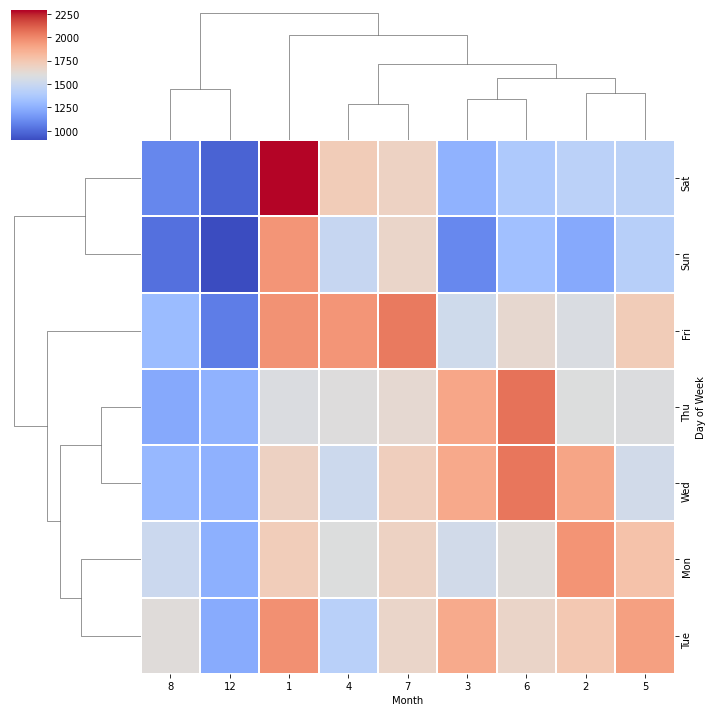

In [95]:
sns.clustermap(byMonth,cmap='coolwarm',lw=1)

<H1>END</H1>
